In [1]:
from Mixture_Models import *

#### Simulating some data

In [2]:
data = make_pinwheel(
    radial_std=0.3,
    tangential_std=0.05,
    num_classes=3,
    num_per_class=100,
    rate=0.4,
    rs=npr.RandomState(0),
)

#### Initializing the model

In [3]:
### PGMM has 8 submodels with different constraints

# test_PGMM = PGMM(data,constraint="CCC") ## "CCC" is the default option
# test_PGMM = PGMM(data,constraint="CCU")
# test_PGMM = PGMM(data,constraint="UCC")
# test_PGMM = PGMM(data,constraint="UCU")
test_PGMM = PGMM(data, constraint="UUU")
# test_PGMM = PGMM(data,constraint="CUU")
# test_PGMM = PGMM(data,constraint="CUC")
# test_PGMM = PGMM(data,constraint="UUC")

#### Initializing the input parameters

In [4]:
npr.seed(10)
init_params = test_PGMM.init_params(
    num_components=3, q=1, scale=0.5
)  # q is the latent subspace
print(init_params)

{'log proportions': array([ 0.66579325,  0.35763949, -0.77270015]), 'means': array([[-0.00419192,  0.31066799],
       [-0.36004278,  0.13275579],
       [ 0.05427426,  0.00214572]]), 'fac_loadings': array([[[-0.08730011],
        [ 0.21651309]],

       [[ 0.60151869],
        [-0.48253284]],

       [[ 0.51413704],
        [ 0.11431507]]]), 'error': array([[ 0.22256881, -0.56830111],
       [ 0.06756844,  0.7422685 ],
       [-0.53990244, -0.98886414]])}


#### Fitting the model with the above initialization parameters

In [5]:
## we are using gradient descent with momentum for 100 iterations with mass = 0.95 and learning rate = 9e-4
params_store = test_PGMM.fit(
    init_params, "grad_descent", learning_rate=0.0009, mass=0.95, maxiter=100
)

Log likelihood -802.4431795969995
Log likelihood -782.355871296667
Log likelihood -751.319729430443
Log likelihood -719.1566073617084
Log likelihood -691.7935186791318
Log likelihood -672.7699688222833
Log likelihood -662.2778869551718
Log likelihood -657.9817816254147
Log likelihood -657.3327102875694
Log likelihood -658.5619870984718
Log likelihood -660.6033864217077
Log likelihood -662.8393423992268
Log likelihood -664.9141081428809
Log likelihood -666.6212899126972
Log likelihood -667.8402333496175
Log likelihood -668.5019544040154
Log likelihood -668.5735947755358
Log likelihood -668.0546466652444
Log likelihood -666.9770984116169
Log likelihood -665.3948710860172
Log likelihood -663.3399299733816
Log likelihood -660.7300941218591
Log likelihood -657.2614669907705
Log likelihood -652.3802438535632
Log likelihood -645.4010719120214
Log likelihood -635.9124207825105
Log likelihood -625.5781936513333
Log likelihood -624.3086554957954
Log likelihood -649.4325555716902
Log likelihood -

#### Posthoc analysis

In [6]:
### We define an auxillary function for plotting the clusters
from scipy.linalg import sqrtm


def draw_clusters(unpacked_params, input_data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for log_proportion, mean, cov_sqrt, error in zip(*unpacked_params):
        cov_sqrt = np.linalg.cholesky(
            (cov_sqrt @ cov_sqrt.T) + (np.diag(error) @ np.diag(error))
        ).T  ### Because this is MFA , there is an additional line
        num_points = 100
        alpha = np.minimum(1.0, np.exp(log_proportion) * 10)
        angles = np.linspace(0, 2 * np.pi, num_points)
        circle_pts = np.vstack([np.cos(angles), np.sin(angles)]).T * 2.0
        cur_pts = mean + np.dot(circle_pts, cov_sqrt)
        ax.plot(cur_pts[:, 0], cur_pts[:, 1], "-", alpha=alpha)
        ax.plot(input_data[:, 0], input_data[:, 1], "k.")
    ax.plot(input_data[:, 0], input_data[:, 1], "k.")

    plt.show()

likelihood -802.4431795969995
aic,bic 1628.886359193999 1673.3317488898733


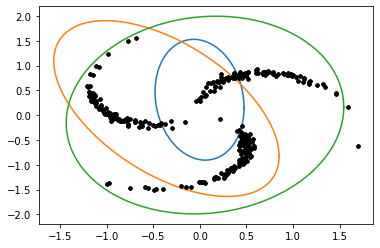

MPKL 2.9409685351708683
likelihood -782.355871296667
aic,bic 1588.711742593334 1633.1571322892084


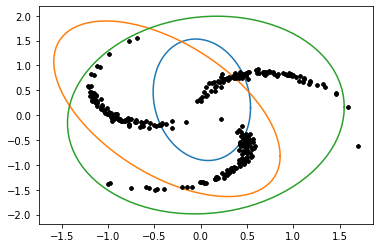

MPKL 2.254296704390476
likelihood -751.319729430443
aic,bic 1526.639458860886 1571.0848485567603


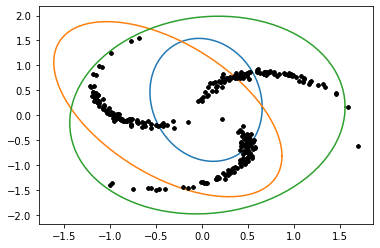

MPKL 1.4519859071962467
likelihood -719.1566073617084
aic,bic 1462.3132147234169 1506.7586044192913


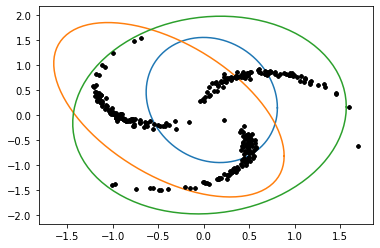

MPKL 0.8743232105103205
likelihood -691.7935186791318
aic,bic 1407.5870373582636 1452.032427054138


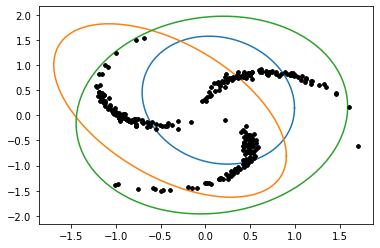

MPKL 0.5317625711403042
likelihood -672.7699688222833
aic,bic 1369.5399376445666 1413.985327340441


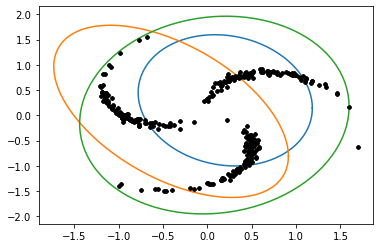

MPKL 0.3457624586119692
likelihood -662.2778869551718
aic,bic 1348.5557739103435 1393.001163606218


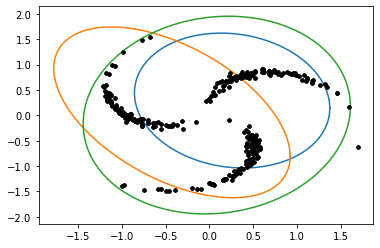

MPKL 0.3465296983862345
likelihood -657.9817816254147
aic,bic 1339.9635632508293 1384.4089529467037


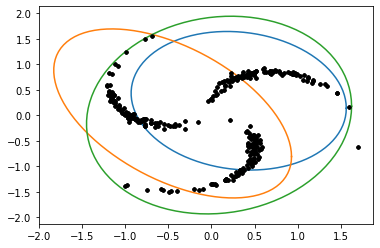

MPKL 0.35443726819190435
likelihood -657.3327102875694
aic,bic 1338.6654205751388 1383.1108102710132


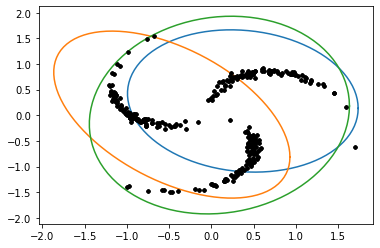

MPKL 0.4135436415752429
likelihood -658.5619870984718
aic,bic 1341.1239741969437 1385.569363892818


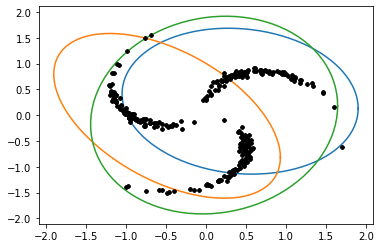

MPKL 0.6229303436790272
likelihood -660.6033864217077
aic,bic 1345.2067728434154 1389.6521625392897


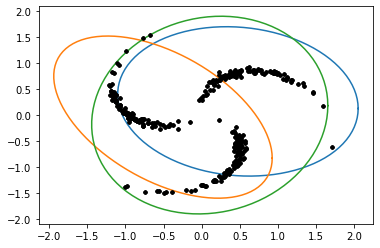

MPKL 0.84451860898626
likelihood -662.8393423992268
aic,bic 1349.6786847984536 1394.124074494328


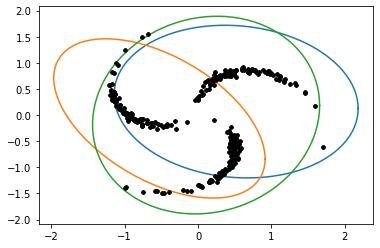

MPKL 1.084383266179925
likelihood -664.9141081428809
aic,bic 1353.8282162857618 1398.2736059816361


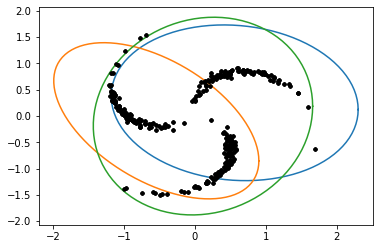

MPKL 1.3498944577455014
likelihood -666.6212899126972
aic,bic 1357.2425798253944 1401.6879695212688


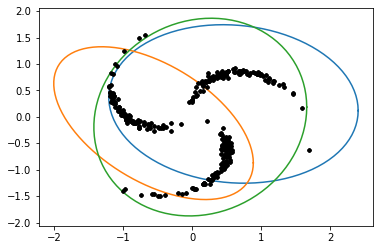

MPKL 1.6506810911767347
likelihood -667.8402333496175
aic,bic 1359.680466699235 1404.1258563951094


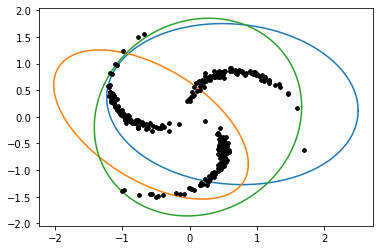

MPKL 1.9997858225016665
likelihood -668.5019544040154
aic,bic 1361.0039088080307 1405.449298503905


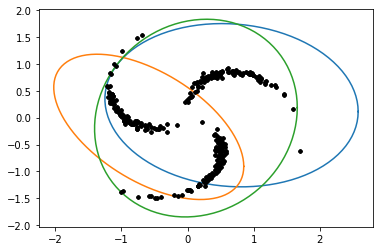

MPKL 2.4153088315850453
likelihood -668.5735947755358
aic,bic 1361.1471895510715 1405.592579246946


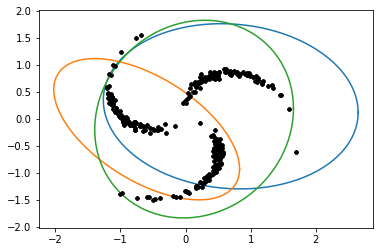

MPKL 2.922884927865269
likelihood -668.0546466652444
aic,bic 1360.1092933304888 1404.5546830263631


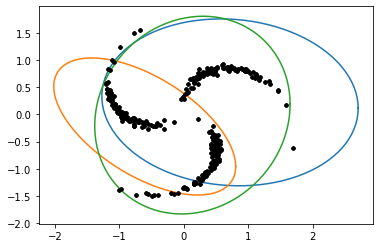

MPKL 3.55947425492504
likelihood -666.9770984116169
aic,bic 1357.9541968232338 1402.3995865191082


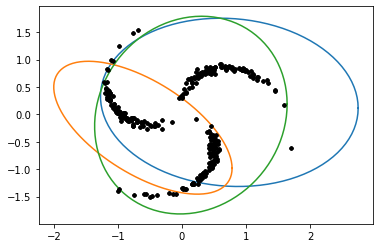

MPKL 4.379193867074873
likelihood -665.3948710860172
aic,bic 1354.7897421720345 1399.2351318679089


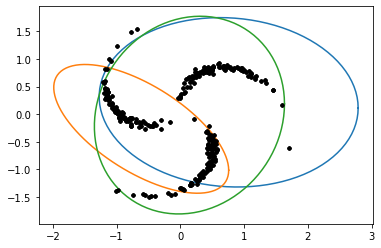

MPKL 5.462392520724445
likelihood -663.3399299733816
aic,bic 1350.6798599467631 1395.1252496426375


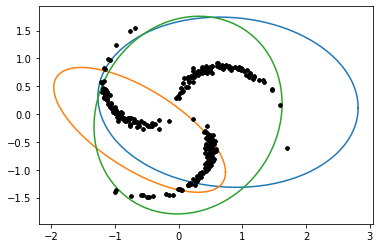

MPKL 6.930256425435266
likelihood -660.7300941218591
aic,bic 1345.4601882437182 1389.9055779395926


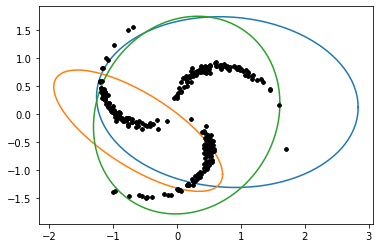

MPKL 8.969928833482918
likelihood -657.2614669907705
aic,bic 1338.522933981541 1382.9683236774154


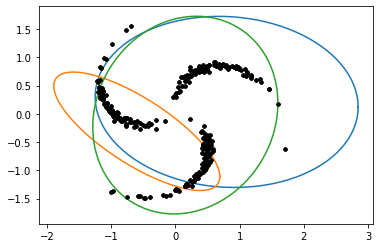

MPKL 11.881376329196424
likelihood -652.3802438535632
aic,bic 1328.7604877071265 1373.2058774030008


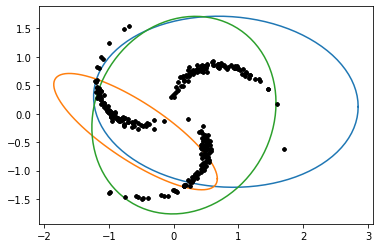

MPKL 16.170484087205217
likelihood -645.4010719120214
aic,bic 1314.8021438240428 1359.2475335199172


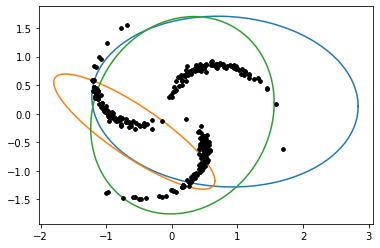

MPKL 22.748234625811733
likelihood -635.9124207825105
aic,bic 1295.824841565021 1340.2702312608953


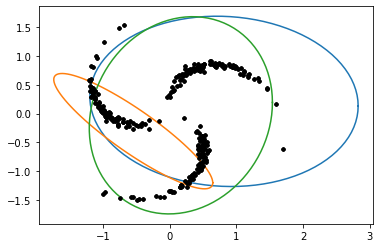

MPKL 33.445889194392535
likelihood -625.5781936513333
aic,bic 1275.1563873026666 1319.601776998541


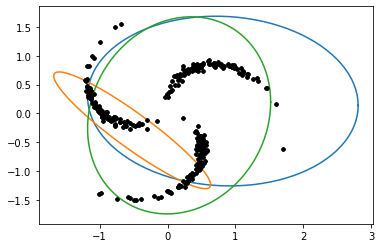

MPKL 52.70358553142344
likelihood -624.3086554957954
aic,bic 1272.6173109915908 1317.0627006874652


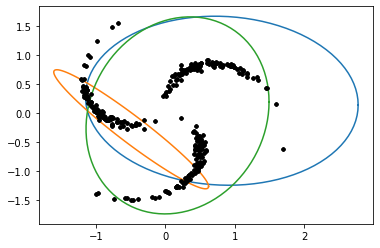

MPKL 93.45550506302679
likelihood -649.4325555716902
aic,bic 1322.8651111433803 1367.3105008392547


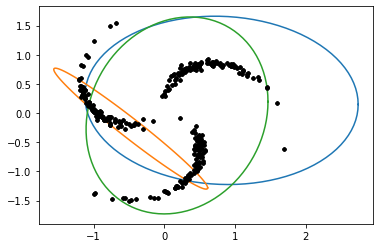

MPKL 180.54049725887154
likelihood -629.2336831338752
aic,bic 1282.4673662677503 1326.9127559636247


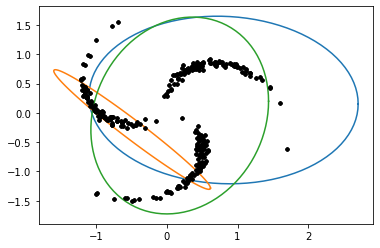

MPKL 186.50618155178145
likelihood -615.5344191620184
aic,bic 1255.0688383240367 1299.5142280199111


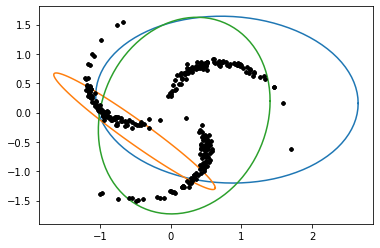

MPKL 125.80122306587344
likelihood -624.6215185641488
aic,bic 1273.2430371282976 1317.688426824172


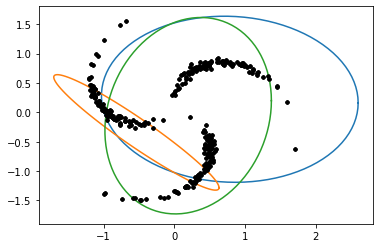

MPKL 86.70500414789275
likelihood -623.7312549871189
aic,bic 1271.4625099742377 1315.907899670112


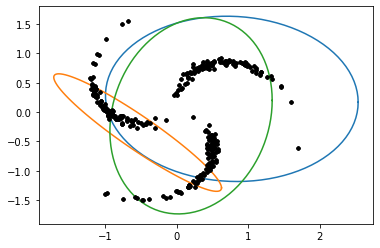

MPKL 60.57313990666476
likelihood -616.2326506894119
aic,bic 1256.4653013788238 1300.9106910746982


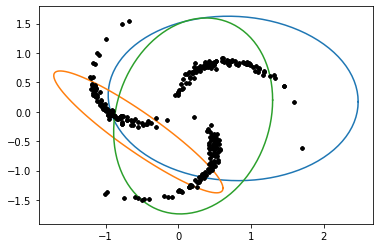

MPKL 44.543366057072824
likelihood -609.1704128041404
aic,bic 1242.3408256082807 1286.7862153041551


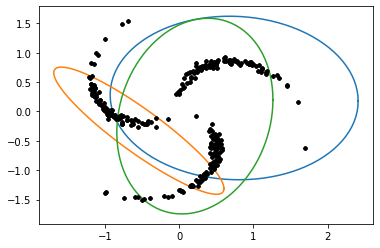

MPKL 35.432917377546545
likelihood -604.6292723372069
aic,bic 1233.2585446744138 1277.7039343702882


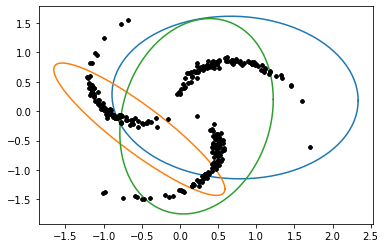

MPKL 30.425445479234664
likelihood -602.4128185074709
aic,bic 1228.8256370149418 1273.2710267108162


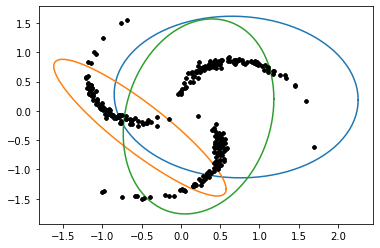

MPKL 27.805839931679003
likelihood -601.343704377297
aic,bic 1226.687408754594 1271.1327984504683


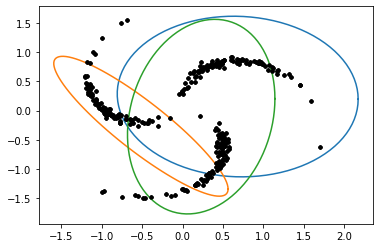

MPKL 26.597254321549915
likelihood -599.4869422731842
aic,bic 1222.9738845463685 1267.4192742422429


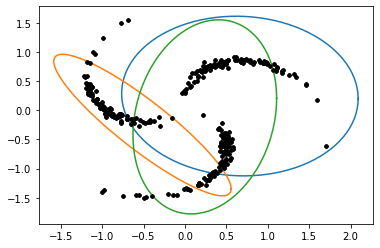

MPKL 26.2395221079353
likelihood -594.9522451525453
aic,bic 1213.9044903050906 1258.349880000965


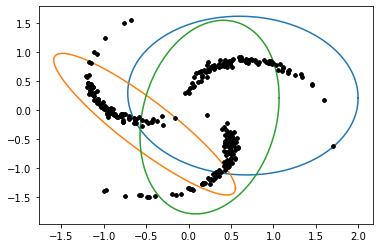

MPKL 26.455900102057733
likelihood -587.2125448206873
aic,bic 1198.4250896413746 1242.870479337249


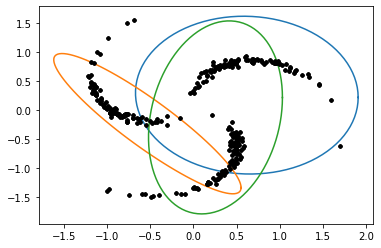

MPKL 27.290757094416257
likelihood -577.6827226985424
aic,bic 1179.3654453970848 1223.8108350929592


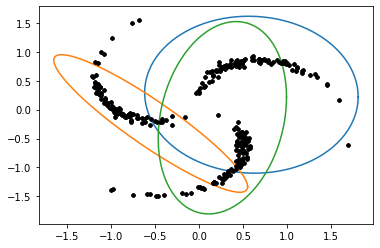

MPKL 29.1839395508662
likelihood -568.8794929364966
aic,bic 1161.7589858729932 1206.2043755688676


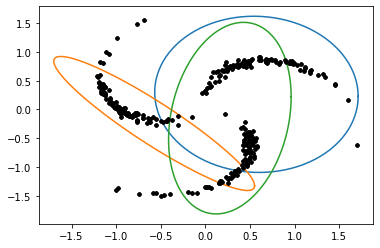

MPKL 33.055779467321905
likelihood -562.8040621530201
aic,bic 1149.6081243060403 1194.0535140019147


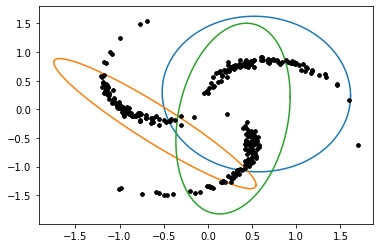

MPKL 40.67565129620644
likelihood -560.6168598209548
aic,bic 1145.2337196419096 1189.679109337784


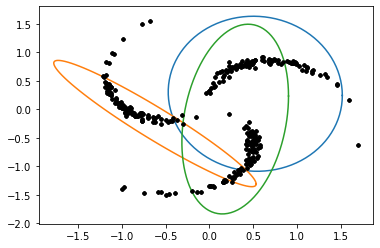

MPKL 56.00504328837419
likelihood -561.3118633569331
aic,bic 1146.6237267138663 1191.0691164097407


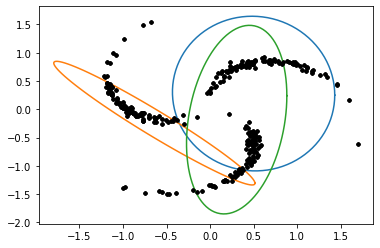

MPKL 86.81682285773597
likelihood -561.0565886269142
aic,bic 1146.1131772538283 1190.5585669497027


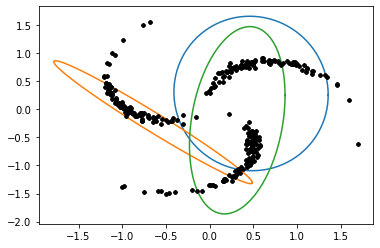

MPKL 148.25646179864128
likelihood -564.6992194006177
aic,bic 1153.3984388012354 1197.8438284971098


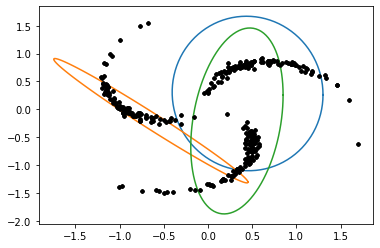

MPKL 214.27022378424593
likelihood -559.0724230974067
aic,bic 1142.1448461948135 1186.5902358906878


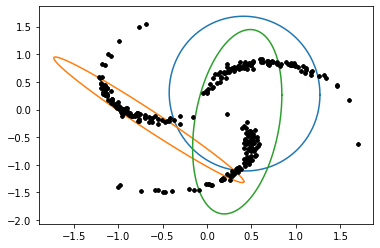

MPKL 150.0124753631243
likelihood -547.2699541940531
aic,bic 1118.5399083881061 1162.9852980839805


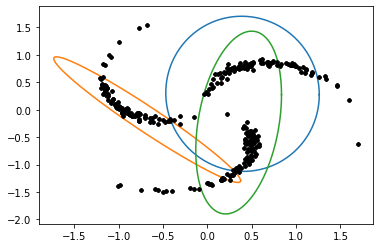

MPKL 83.59395073018275
likelihood -544.3600822078265
aic,bic 1112.720164415653 1157.1655541115274


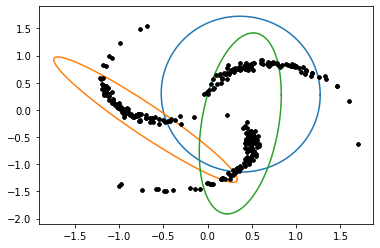

MPKL 54.22516615262502
likelihood -541.9970547170869
aic,bic 1107.9941094341739 1152.4394991300483


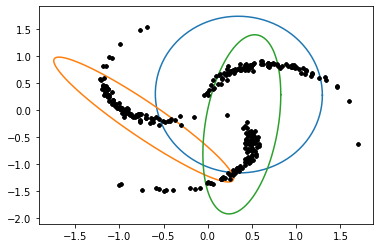

MPKL 41.98250324972537
likelihood -537.0211825971539
aic,bic 1098.0423651943079 1142.4877548901823


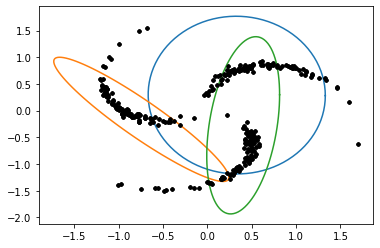

MPKL 37.40122551656393
likelihood -528.6995517959182
aic,bic 1081.3991035918364 1125.8444932877107


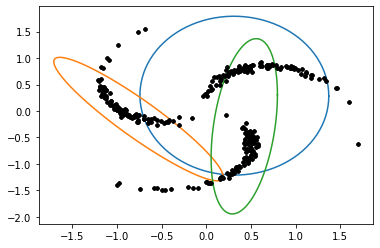

MPKL 37.586460587783115
likelihood -516.8585474732245
aic,bic 1057.717094946449 1102.1624846423233


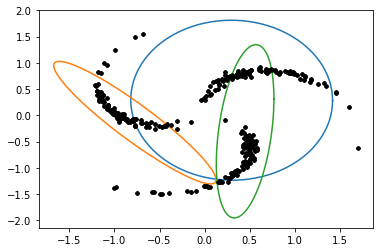

MPKL 42.589084163329495
likelihood -502.72095802869006
aic,bic 1029.4419160573802 1073.8873057532546


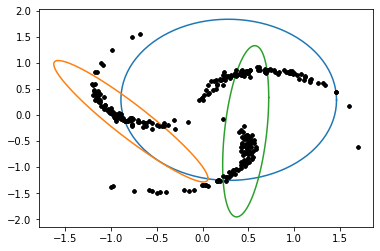

MPKL 55.415354971068126
likelihood -494.11151008071545
aic,bic 1012.2230201614309 1056.6684098573053


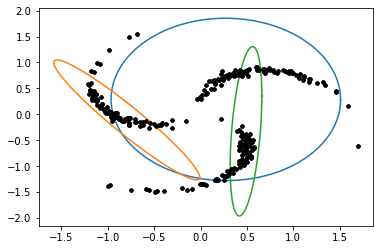

MPKL 91.67197488711713
likelihood -499.6295397703074
aic,bic 1023.2590795406148 1067.7044692364893


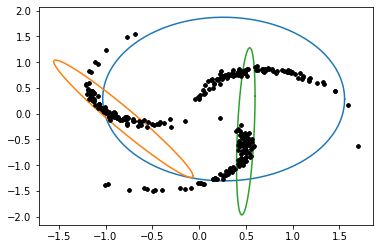

MPKL 359.588958624843
likelihood -490.7144408254918
aic,bic 1005.4288816509836 1049.874271346858


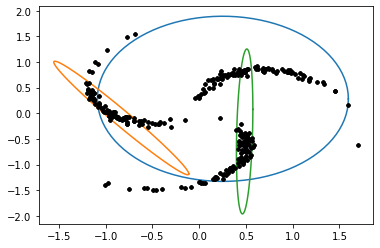

MPKL 334.85441117549533
likelihood -487.9420914141043
aic,bic 999.8841828282086 1044.329572524083


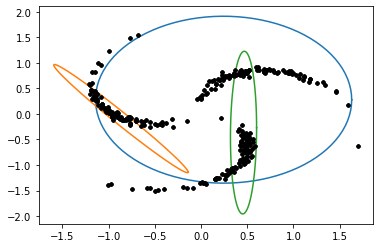

MPKL 447.4493136154779
likelihood -492.3087797480956
aic,bic 1008.6175594961912 1053.0629491920656


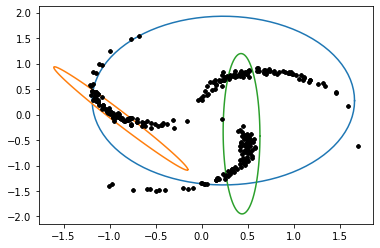

MPKL 435.54807017801176
likelihood -484.6839745085792
aic,bic 993.3679490171584 1037.8133387130329


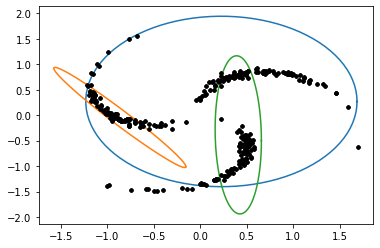

MPKL 280.5457936746989
likelihood -492.8769916448423
aic,bic 1009.7539832896846 1054.199372985559


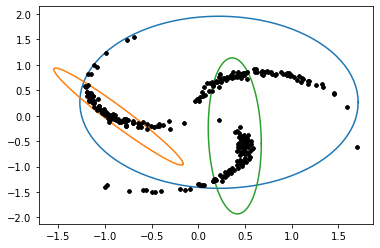

MPKL 185.42063574669376
likelihood -496.17206833761077
aic,bic 1016.3441366752215 1060.789526371096


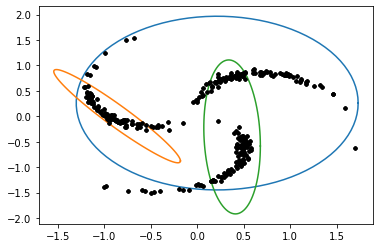

MPKL 130.15325278742694
likelihood -495.78664038141613
aic,bic 1015.5732807628323 1060.0186704587068


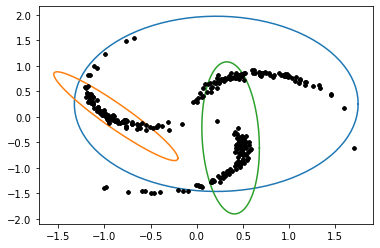

MPKL 102.21171793745683
likelihood -493.95665443247714
aic,bic 1011.9133088649543 1056.3586985608288


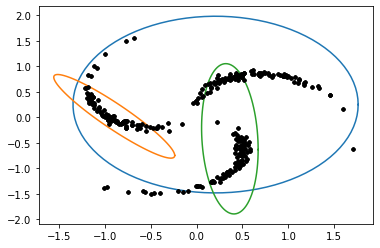

MPKL 92.90154813260648
likelihood -489.4341133070893
aic,bic 1002.8682266141786 1047.313616310053


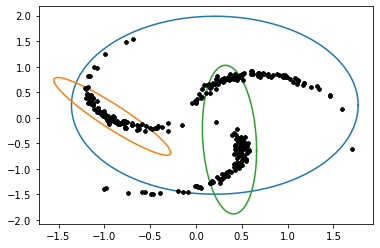

MPKL 98.76539921328362
likelihood -481.1761265501316
aic,bic 986.3522531002632 1030.7976427961376


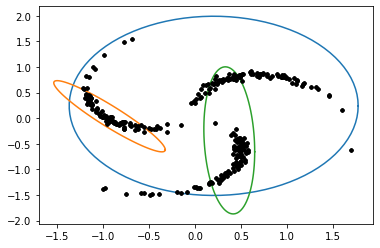

MPKL 124.84689305144107
likelihood -471.2462589373413
aic,bic 966.4925178746826 1010.937907570557


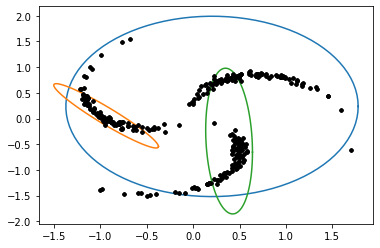

MPKL 192.36228148823443
likelihood -468.19721326865687
aic,bic 960.3944265373137 1004.8398162331881


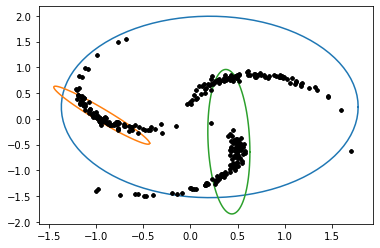

MPKL 332.29282391702543
likelihood -456.7097781386234
aic,bic 937.4195562772468 981.8649459731212


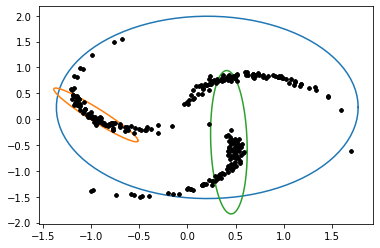

MPKL 332.9306600789668
likelihood -447.24265828182354
aic,bic 918.4853165636471 962.9307062595215


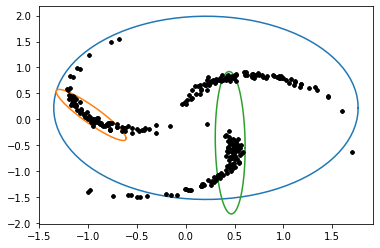

MPKL 253.3110069163477
likelihood -452.8983118368805
aic,bic 929.796623673761 974.2420133696354


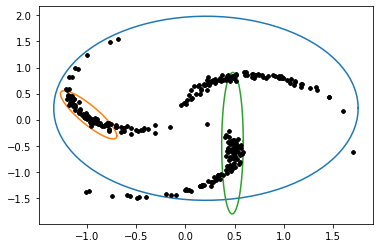

MPKL 242.1920580947589
likelihood -466.45381289549556
aic,bic 956.9076257909911 1001.3530154868655


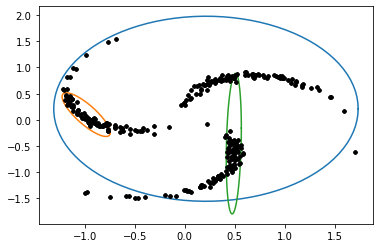

MPKL 643.6208294016728
likelihood -457.3678475976151
aic,bic 938.7356951952302 983.1810848911045


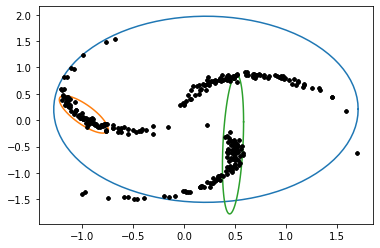

MPKL 309.8630979744362
likelihood -458.7823694177783
aic,bic 941.5647388355566 986.010128531431


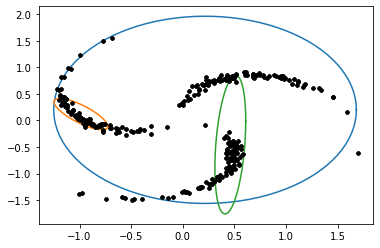

MPKL 199.78949108978892
likelihood -462.4979792374951
aic,bic 948.9959584749902 993.4413481708646


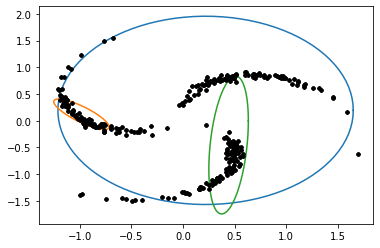

MPKL 234.74931004285543
likelihood -449.0570936101501
aic,bic 922.1141872203002 966.5595769161746


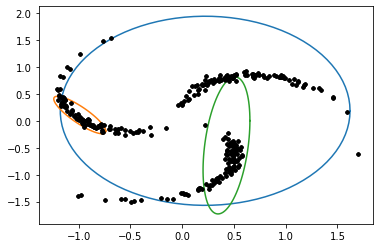

MPKL 289.2560356897727
likelihood -453.4214232701299
aic,bic 930.8428465402598 975.2882362361341


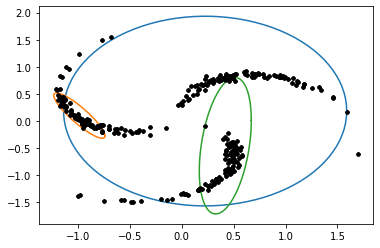

MPKL 359.7271936539696
likelihood -450.7644598025586
aic,bic 925.5289196051172 969.9743093009915


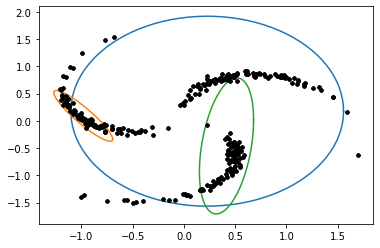

MPKL 338.96476150064547
likelihood -446.14522793463533
aic,bic 916.2904558692707 960.735845565145


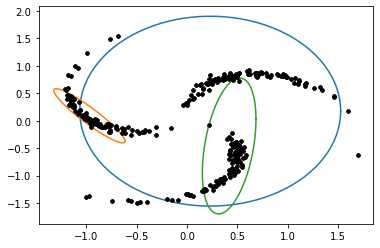

MPKL 290.9896419642976
likelihood -447.11830676792465
aic,bic 918.2366135358493 962.6820032317237


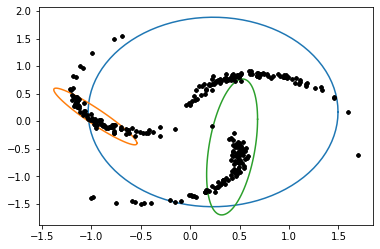

MPKL 250.92180840104135
likelihood -448.42374610379585
aic,bic 920.8474922075917 965.2928819034661


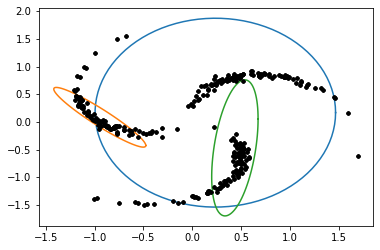

MPKL 201.15685077166043
likelihood -447.21274976172583
aic,bic 918.4254995234517 962.870889219326


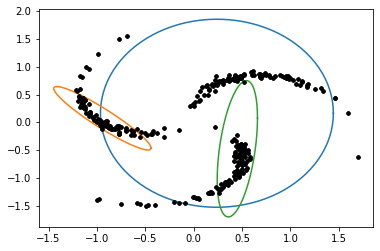

MPKL 155.2272380680695
likelihood -447.15608537374754
aic,bic 918.3121707474951 962.7575604433695


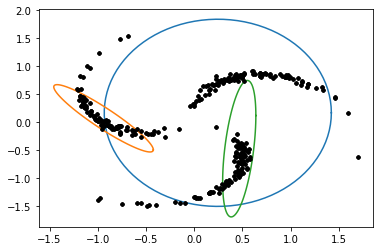

MPKL 134.34820531874962
likelihood -449.35851022730475
aic,bic 922.7170204546095 967.1624101504839


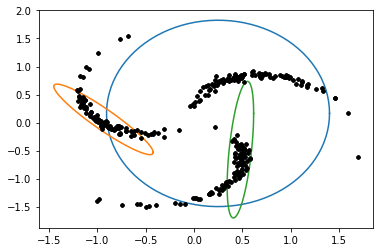

MPKL 243.97136714326416
likelihood -451.5758337420304
aic,bic 927.1516674840608 971.5970571799352


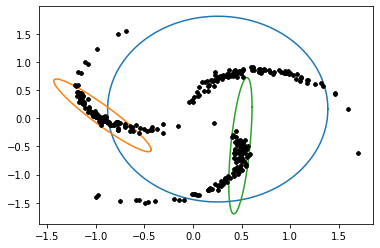

MPKL 351.9526019528661
likelihood -449.52267683309515
aic,bic 923.0453536661903 967.4907433620647


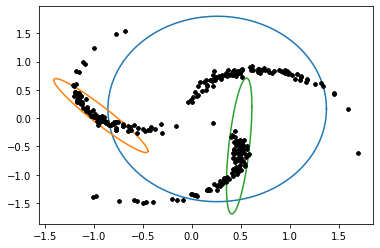

MPKL 252.08293723742597
likelihood -447.88953022953
aic,bic 919.77906045906 964.2244501549344


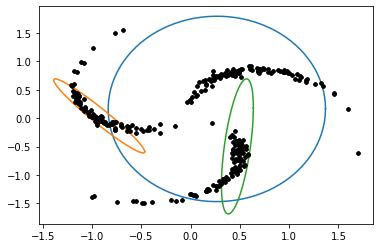

MPKL 310.22173146376434
likelihood -447.7854366941844
aic,bic 919.5708733883688 964.0162630842432


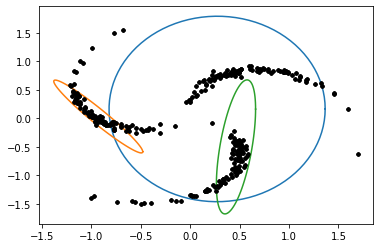

MPKL 329.41665741569796
likelihood -447.5125459922815
aic,bic 919.025091984563 963.4704816804374


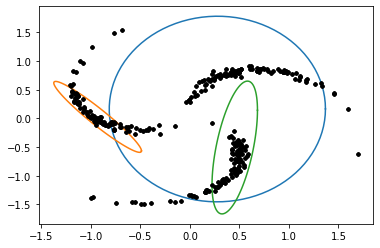

MPKL 271.62816762575056
likelihood -446.00794895144145
aic,bic 916.0158979028829 960.4612875987573


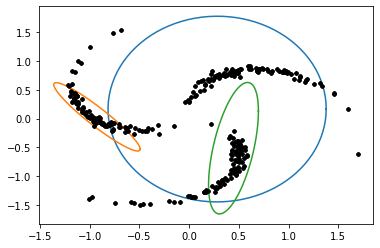

MPKL 211.6487148494181
likelihood -444.5278872047121
aic,bic 913.0557744094242 957.5011641052986


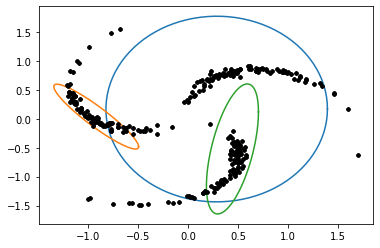

MPKL 178.68409473259842
likelihood -441.9958192988909
aic,bic 907.9916385977818 952.4370282936562


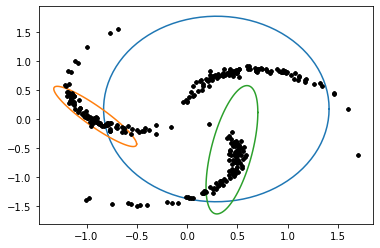

MPKL 167.72957241390932
likelihood -437.88885918132667
aic,bic 899.7777183626533 944.2231080585277


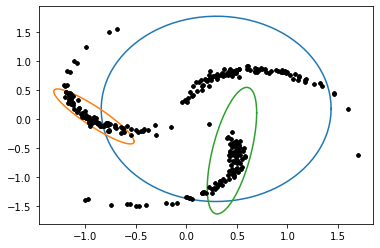

MPKL 173.31144989643798
likelihood -433.8001105884095
aic,bic 891.600221176819 936.0456108726934


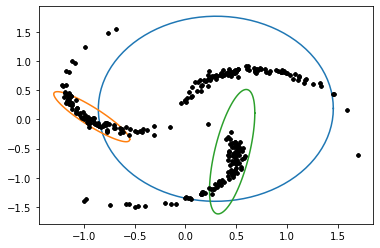

MPKL 193.38151947909446
likelihood -430.13756173975474
aic,bic 884.2751234795095 928.7205131753839


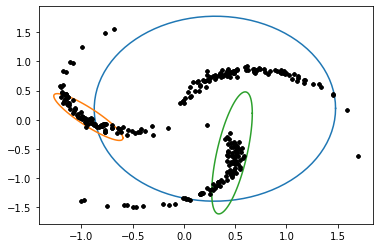

MPKL 226.0279697454171
likelihood -428.57703827457055
aic,bic 881.1540765491411 925.5994662450155


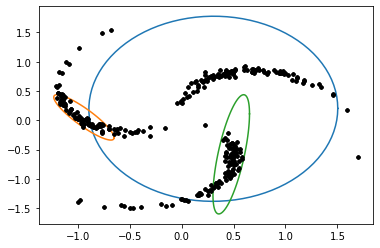

MPKL 278.17652351052186
likelihood -431.10989229232257
aic,bic 886.2197845846451 930.6651742805195


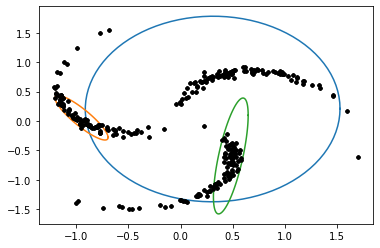

MPKL 338.7796431563503
likelihood -426.8581622178665
aic,bic 877.716324435733 922.1617141316074


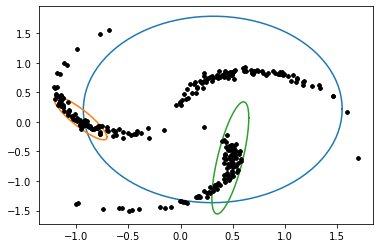

MPKL 336.68729997355814


In [7]:
for params in params_store:
    print("likelihood", test_PGMM.likelihood(params))
    print("aic,bic", test_PGMM.aic(params), test_PGMM.bic(params))

    draw_clusters(test_PGMM.unpack_params(params), data)

    kl_cov = []
    for log_proportion, mean, cov_sqrt, error in zip(*test_PGMM.unpack_params(params)):
        kl_cov.append((cov_sqrt @ cov_sqrt.T) + (np.diag(error) @ np.diag(error)))
    print("MPKL", test_PGMM.print_mpkl(params["means"], kl_cov))

In [9]:
### Final labels

np.array(test_PGMM.labels(data, params_store[-1]))

array([0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])